<a href="https://colab.research.google.com/github/AtaruOhto/google-colab-sandbox/blob/master/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

%matplotlib inline

train_data = pd.read_csv("./train.csv")
train_data

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0
27096,27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0
27097,27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,0
27098,27098,30,admin.,single,secondary,no,99621,yes,no,cellular,27,may,121,1,100,0,unknown,0


In [22]:
y = train_data.y.values
train_data = train_data.drop(["y"], axis=1)

# 特徴選択
train_data = train_data.drop(["id"], axis=1)
# train_data = train_data.drop(["balance"], axis=1)
# train_data = train_data.drop(["previous"], axis=1)
# train_data = train_data.drop(["age"], axis=1)
 


train_data["default"] = train_data["default"].map(dict(no=0, yes=1)).astype('int64')
train_data["housing"] = train_data["housing"].map(dict(no=0, yes=1)).astype('int64')
train_data["loan"] = train_data["loan"].map(dict(no=0, yes=1)).astype('int64')
train_data["month"] = train_data["month"].map(dict(jan=1, feb=2, mar=3, apr=4, may=5, jun=6, jul=7, aug=8, sep=9, oct=10, nov=11, dec=12)).astype('int64')
X = pd.get_dummies(train_data ,columns=['job', "marital", "education", "contact", "poutcome"])

X.dtypes
X

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,31,0,12294,1,0,21,11,101,3,498,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,29,0,43027,0,0,22,8,158,2,702,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,35,0,12252,1,0,11,11,351,1,826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3,31,0,99121,1,1,16,5,658,2,120,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
4,48,0,42005,1,0,3,4,177,1,273,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,0,26661,1,0,27,5,345,4,425,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
27096,35,0,42150,1,0,27,5,121,1,719,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
27097,35,0,34531,0,0,28,6,177,2,121,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
27098,30,0,99621,1,0,27,5,121,1,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1


In [24]:
stratifiedkfold = StratifiedKFold(n_splits=3)

algorithm = XGBClassifier(objective="binary:logistic")

scores = cross_val_score(algorithm, X_train, y_train, cv=stratifiedkfold, scoring="roc_auc")
score = scores.mean()
name = algorithm.__class__.__name__
print(f"{name}: mean {score:.4f}, score {scores}")

algorithm.fit(X_train, y_train)

y_pred = algorithm.predict(X_test)



from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")
print(precision)
print(recall)
print(fscore)

accuracy_score(y_pred, y_test)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
f"AUC : {auc}"

XGBClassifier: mean 0.8404, score [0.82931883 0.85705344 0.83493106]
0.7931034482758621
0.14175654853620956
0.24052287581699347


'AUC : 0.5692742106402475'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[7488,   25],
       [ 529,   88]])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_

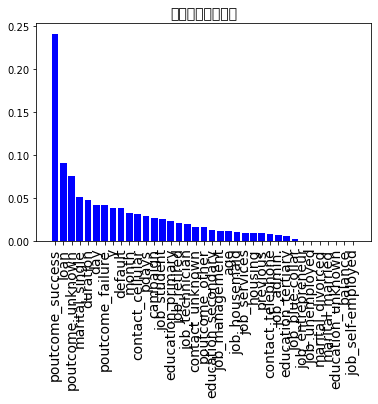

poutcome_success       0.241441
loan                   0.090648
poutcome_unknown       0.075652
marital_single         0.051288
duration               0.047150
day                    0.041859
poutcome_failure       0.041401
y                      0.038593
default                0.038076
month                  0.032289
contact_cellular       0.030896
pdays                  0.028518
campaign               0.026163
job_student            0.025747
education_primary      0.022932
job_retired            0.020659
job_technician         0.019123
contact_unknown        0.015922
poutcome_other         0.015583
education_secondary    0.012370
job_management         0.011144
age                    0.010993
job_housemaid          0.010588
job_services           0.009531
housing                0.009128
previous               0.008987
contact_telephone      0.008067
job_admin.             0.007014
education_tertiary     0.005935
job_blue-collar        0.002304
job_entrepreneur       0.000000
job_unem

In [ ]:
# 重要度分析をする (各特徴量の寄与率を調査)

importances = algorithm.feature_importances_
w = pd.Series(importances, index=X.columns)

u = w.sort_values(ascending=False)
v = u

plt.title("入力項目の重要度", fontsize=14)
plt.bar(range(len(v)), v, color="b", align="center")
plt.xticks(range(len(v)), v.index, rotation=90, fontsize=14)
plt.show()

u

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
auc

0.5696490211132686